# Contrôle optimal TP 3

Contrôle optimal de l'équation de la chaleur

In [65]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.linalg import solve
from scipy.integrate import trapz
import math

## Introduction 



On considère une barre unidimensionnelle de longueur $L > 0$. La température de l'extrémité gauche de la barre ( $ x = 0 $ ) est maintenue à $0^{\circ}\mathrm{K}$, et on cherche à contrôler la température de la barre à l'extrémité droite ($x = L$) à l'aide d'un flux de chaleur $t \mapsto u(t)$. On appelle $y_u(t, x)$ la température de cette barre au temps $t \in [0, T]$ et en $x \in [0, L]$.

On suppose que $y_u$ résout l'équation de la chaleur
$$
\begin{cases}
    \partial_t y_u(t, x) - \partial_{xx} y_u(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    y_u(0, x) = 0, & x \in [0, L] \\
    y_u(t, 0) = 0, & t \in [0, T] \quad (\text{condition de Dirichlet homogène}) \\
    \partial_x y_u(t, L) = u(t), & t \in [0, T] \quad (\text{condition de Neumann non-homogène})
\end{cases}
$$

et on s'intéresse au problème de contrôle optimal
$$
\inf_{u \in L^2(]0, T[)} J(u)
$$
où
$
J(u) = \frac{1}{2} \int_{0}^{T} (y_u(t, L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_{0}^{T} u(t)^2 \, dt \quad (\text{P})
$
où $\varepsilon > 0$ est un paramètre fixé, et $z_d \in L^2(]0, T[)$ est donnée.


## Question 1

Montrer que $J$ est différentiable. En introduisant un problème adjoint bien choisi, calculer le gradient de $J$ en $u$.

### Montrons la différentiabilité de $J$



$
J(u) = \frac{1}{2} \int_{0}^{T} (y_u(t, L) - z_d(t))^2 \, dt + \frac{\varepsilon}{2} \int_{0}^{T} u(t)^2 \, dt \quad (\text{P})
$
où $\varepsilon > 0$ est un paramètre fixé, et $z_d \in L^2(]0, T[)$ 


Soit $(u, h) \in U^2_{ad}$. Puisque $U_{ad}$ est convexe, alors $u + \varepsilon h $ appartient à $U_{ad}$.


Posons $z_h = \frac{ y_{u + \varepsilon h} - y_u}{\varepsilon}$ , on $z_h$ solution de 

$$
\begin{cases}
    \partial_t z_{h}(t, x) - \partial_{xx} z_{h}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    z_{h}(0, x) = 0, & x \in [0, L] \\
    z_{h}(t, 0) = 0, & t \in [0, T] \\
    \partial_x z_{h}(t, L) =  h(t), & t \in [0, T] 
\end{cases}
$$

Si $ u \mapsto y_u $ est différentiable alors sa différentielle est $z_h$. Pour montrer la différentiabilité, on doit prouver que :

$$|| y_{u+h} - y_u - z_h ||_{L^2(]0, T[)} = o(||h||) $$





Posons $S_h = y_{u+h} - y_u - z_h$ , on a :

$$
\begin{cases}
    \partial_t S_{h}(t, x) - \partial_{xx} S_{h}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    S_{h}(0, x) = 0, & x \in [0, L] \\
    S_{h}(t, 0) = 0, & t \in [0, T] \\
    \partial_x S_{h}(t, L) = 0, & t \in [0, T] 
\end{cases}
$$

Par unicité de la solution de l'EDP, on a :
$$S_{h} = 0 = o(||h||)$$
Il reste à montrer que $ h \mapsto z_h$ est continue où 
$$
\begin{cases}
    \partial_t z_{h}(t, x) - \partial_{xx} z_{h}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
    z_{h}(0, x) = 0, & x \in [0, L] \\
    z_{h}(t, 0) = 0, & t \in [0, T] \\
    \partial_x z_{h}(t, L) = h(t), & t \in [0, T] 
\end{cases}
$$

On veut monter qu'il existe $C>0$ tel que $ $




Par composition d'applications différentiables, la fonction $J$ est différentiable.


### Calculons le gradient de $J$

Considérons la fonction coût $J(u) = J_1(u) + J_2(u) $

Avec $J_1(u) = \frac{1}{2} \int_{0}^{T} (y_u(t, L) - z_d(t))^2 \, dt$ et 
$J_2(u) = \frac{\alpha}{2} \int_{0}^{T} u(t)^2 \, dt $

où $ \alpha > 0 $ est un paramètre fixé et  $z_d \in L^2(]0, T[)$ est donnée

Calculons la différentiel de $J_2(u)$ :

$$
 \frac{ J_2(u + \varepsilon h ) - J_2(u) }{\varepsilon}= 
\frac{\alpha }{2\varepsilon} \int_{0}^{T} (u + \varepsilon h)^2 - u^2\, dt=
\frac{\alpha }{2\varepsilon} \int_{0}^{T}  2 \varepsilon h u - \varepsilon ^2 h^2\, dt =
\frac{\alpha }{2} \int_{0}^{T}  2 \varepsilon h u - \varepsilon  h\, dt 
$$

Donc $ D J_2(u)h = \int_{0}^{T} \alpha h u \, dt $

Calculons la différentiel de $J_1(u)$ :

$$ 
\begin{align*}
\frac{ J_1(u + \varepsilon h ) - J_1(u) }{\varepsilon}  &=  
\frac{1}{2\varepsilon} \int_{0}^{T} (y_{u + \varepsilon h }(t, L) - z_d(t))^2  - (y_{u}(t, L) - z_d(t))^2\, dt \\ &= 
\frac{1}{2} \int_{0}^{T} [\frac{y_{u + \varepsilon h }(t, L) - y_h }{\varepsilon}][ y_{u + \varepsilon h }(t, L) + y_u(t, L) - z_d(t)] \, dt 
\end{align*}
$$

Donc $$ D J_1(u)h = \underset{\varepsilon \to 0}{lim} \frac{ J_1(u + \varepsilon h ) - J_1(u) }{\varepsilon} = \int_{0}^{T}  z_h(t, L)  (y_u(t, L) - z_d(t))\, dt $$

Avec $z_h(t, L) = \frac{y_{u + \varepsilon h }(t, L) - y_h(t, L) }{\varepsilon} $ 

Suivons la méthodologie de l'adjoint :
* Etape 1

    L'équation de $z_h$ est sous la forme $ Rz_h = 0$ avec $R = \partial_t -\Delta $ et on a $R^{*} = -\partial_t -\Delta $


* Etape 2

    Soit $p$ solution de $ -\partial_t p -\Delta p = G$
    où $G$ est un second membre à préciser.

* Etape 3

    On multiplie l’équation sur $z_h$ par $p$ et on intègre 
    $$
    \int_{0}^{T} \int_{0}^{L} (\partial_t z_h- \partial_{xx} z_h ) p \,dx \,dt = 0
    $$

    On intègre par parties : 
    $$
    \int_{0}^{L} [ z_{h}p]^{T}_{0} \,dx - \int_{0}^{T}\int_{0}^{L} z_h\cdot{} \partial_t p \,dx \,dt - \int_{0}^{T} [ \partial_{x} z_{h} \cdot{}p]^{L}_{0} + \int_{0}^{T}\int_{0}^{L} \partial_{x} z_h \cdot{}\partial_{x}p \,dx \,dt = 0
    $$

    
    Comme $z_h(0,x) = 0$ et en simplifiant on obtient
    $$
    \int_{0}^{L} z_{h}(T,.)p(T,.) \,dx - \int_{0}^{T} [ \partial_{x} z_{h} \cdot{}p]^{L}_{0}\,dt + \int_{0}^{T}\int_{0}^{L} - z_h\cdot{} \partial_t p  + \partial_{x} z_h \cdot{}\partial_{x}p \,dx \,dt  = 0 \quad (1)
    $$


    On multiplie l’équation sur $p$ par $z_h$ 
    $$
    \int_{0}^{T} \int_{0}^{L} (- \partial_t p- \partial_{xx} p ) z_h \,dx \,dt = \int_{0}^{T} \int_{0}^{L} G z_h
    $$

    On intègre par parties en espace : 
    $$
    \int_{0}^{T} \int_{0}^{L} -\partial_t p \cdot{}z_{h} +  \partial_{x}p\cdot{}\partial_{x}z_h  \,dx \,dt - \int_{0}^{T} [ \partial_{x}p\cdot{}z_{h}]^{L}_{0} \,dt = \int_{0}^{T} \int_{0}^{L} G z_h \,dx \,dt \quad (2)
    $$

    En soustrayant $(2)$ par $(1)$, on a 
    $$
    -\int_{0}^{L} z_{h}(T,.)p(T,.) \,dx + \int_{0}^{T} [ \partial_{x} z_{h} \cdot{}p]^{L}_{0}\,dt - \int_{0}^{T} [ \partial_{x}p\cdot{}z_{h}]^{L}_{0} \,dt = \int_{0}^{T} \int_{0}^{L} G z_h \,dx \,dt 
    $$

    Comme $z_{h}(t,0) = 0$ ,et en choisissant $p(t,0) = p(T,x) = 0$ et aussi $G = 0$ , on a 
    $$
    \int_{0}^{T} \partial_{x} z_{h}(t,L) \cdot{} p(t,L)\,dt - \int_{0}^{T} \partial_{x} p(t,L) \cdot{}z_{h}(t,L)  \,dt = 0
    $$

    Puisque $\partial_{x} z_{h}(t,L) = h(t) $   puis on choisit $\partial_x p(t, L) = y_u(t, L) - z_d(t)$,  on obtient :
    $$
    \int_{0}^{T} h(t) \cdot{} p(t,L)\,dt = \int_{0}^{T} [ y_u(t, L) - z_d(t) ] \cdot{}z_{h}(t,L)  \,dt 
    $$

    Donc $ D J_1(u)h = \int_{0}^{T} h(t) \cdot{} p(t,L)\,dt  $

Finalement $$ D J(u)h = \int_{0}^{T} h(t) \cdot{} ( p(t,L) + \alpha u(t))\,dt  $$
où $p$ est solution de 
$$
\begin{cases}
    \partial_t p(t, x) + \partial_{xx} p(t, x) = 0 &  t \in ]0, T[,\ x \in ]0, L[ \\
    p(0, x) = 0 &  x \in [0, L] \\
    p(t, 0) = 0 &  t \in [0, T] \\
    \partial_x p(t, L) = y_u(t, L) - z d(t) &  t \in [0, T]
\end{cases}
$$

## Question 2

Décrire et mettre en œuvre une méthode numérique de résolution de l'équation de la chaleur par une méthode de type différences finies centrées en espace et décentrées en amont en temps. Vérifier sur des exemples simples que cette méthode fonctionne.

### Description de la méthode numérique

Pour résoudre numériquement cette EDP, on utilise des méthodes de type différences finies centrées en espace et décentrées en amont en temps. Pour cela, on discrétise l'intervalle $[0, L]$ en $N_x + 1$ points et $[0, T]$ en $N_t + 1$ points. Introduisons $\Delta x = \frac{L}{N_x}$ et $\Delta t = \frac{T}{N_t}$, les pas d'espace et de temps, de sorte que 
$$
x_i = i \Delta x, \space i \in [0, N_x] \text{ et } t_k = k \Delta t, \space k \in [0, N_t].$$
Soit $y^{k}_{i} \approx y(x_i, t^k)$ pour tout $(i, k) \in [1, N] \times [0, N_t]$. Des développements de Taylor fournissent

$$
y_{xx}(x_i, t^k) \approx \frac{y^{k}_{i+1} - 2y^{k}_{i} + y^{k}_{i-1}}{\Delta x^2}, \quad y_t(x_i, t^k) \approx \frac{y^{k}_{i} - y^{k-1}_{i}}{\Delta t}.
$$

On rappelle que le schéma implicite est inconditionnellement stable pour toute valeur de $\Delta t$.

**Schéma numérique pour le problème direct (équation de la chaleur).**
On obtient le schéma numérique
$$
\frac{y^{k}_{i} - y^{k-1}_{i}}{\Delta t} + \frac{- y^{k}_{i+1} + 2y^{k}_{i} - y^{k}_{i-1}}{\Delta x^2} = 0, \quad i \in [1, N_x - 1].
$$

De plus, en utilisant la condition de Dirichlet $y_0 = 0$, on a
$$
\frac{y^{k}_{1} - y^{k-1}_{1} }{\Delta t} + \frac{ 2y^{k}_{1} - y^{k}_{2} }{\Delta x^2} = 0.
$$

Pour le bord Neumann, on utilise une approximation de la dérivée à l'ordre 1. Par développement de Taylor autour de $y^{k}_{N+1}$, on obtient $y^{k}_{N+1} \approx y^{k}_{N} + \partial_x y(L, t^k) \Delta x = y^{k}_{N} + u(t^k) \Delta x$ et en ré-injectant ce résultat dans le schéma, on a alors pour $i = N$,
$$
\frac{y^{k}_{N} - y^{k-1}_{N}}{\Delta t} + \frac{-y^{k}_{N-1} + y^{k}_{N}} {\Delta x^2} = \frac{u(t^k)}{\Delta x}.
$$
Désignons par $I$ la matrice identité, le schéma s'écrit donc sous forme matricielle :
$$
Y^k - Y^{k-1} + \frac{\Delta t}{\Delta x^2} A Y^k = \frac{\Delta t}{\Delta x} b^k, \quad \forall k \in [0, N_t],
$$
soit
$$
(I + \frac{\Delta t}{\Delta x^2} A) Y^k = \frac{\Delta t}{\Delta x} b^k + Y^{k-1}, \quad \forall k \in [0, N_t],
$$

$$
\begin{align*}
Y_k &= \begin{bmatrix} y^{k}_{1} \\ \vdots \\ y^{k}_{i} \\ \vdots \\ y^{k}_{N} \end{bmatrix}, &
A &= \begin{bmatrix} 2 & -1 & 0 & \cdots & 0 \\ -1 & 2 & \ddots & \ddots & \vdots \\ 0 & \ddots & \ddots & \ddots & 0 \\ \vdots & \ddots & \ddots & 2 & -1 \\ 0 & \cdots & 0 & -1 & 1 \end{bmatrix}, \text{ et }  & 
b^k &= \begin{bmatrix} 0 \\ \vdots \\ 0 \\ \vdots \\ u(t^k) \end{bmatrix}.
\end{align*}
$$


### Résolution de l'équation de la chaleur 

In [5]:
def direct_scheme(Nx, Nt, L, T, y_func, u_func):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Construction de la matrice A
    A = np.diag(2 * np.ones(Nx)) - np.diag(np.ones(Nx-1 ), k=-1) - np.diag(np.ones(Nx -1), k=1)

    # Initialisation de la solution
    Y = np.zeros((Nt, Nx))



    # Construction de la matrice b
    for k in range(1, Nt):
        b = np.zeros(Nx)
        b[-1] = u_func(t_values[k]) 


        # Résolution du système linéaire
        Y[k, :] = solve(np.eye(Nx) + dt / (dx ** 2) * A, dt / dx * b)

    return x_values, t_values, Y



### Vérifions sur des exemples simples 

In [6]:
# Fonction pour calculer l'erreur L2
def calculate_l2_error(Y, U_exact, dx, dt):
    return np.sqrt(np.sum((Y - U_exact)**2) * dx * dt / np.sum(U_exact**2))  
    # return np.sqrt(np.sum((Y - U_exact)**2) * dx * dt)  

def Etude(y_u, u ) :
    # Paramètres
    L = 1.0
    T = 0.1
    Nx_values = [50, 100, 200, 400]  # Différentes valeurs de Nx à tester
    Nt_values = [100, 200, 400, 800]  # Différentes valeurs de Nt à tester

    # Stockage des résultats d'erreur pour l'analyse de convergence
    errors = []

    # Boucle sur différentes valeurs de Nx et Nt
    for Nx in Nx_values:
        for Nt in Nt_values:
            # Appeler la fonction de résolution du problème direct
            x_values, t_values, Y = direct_scheme(Nx, Nt, L, T, y_u, u)

            # Calculer la solution exacte aux mêmes points
            U_exact = np.array([[y_u(t, x) for x in x_values[:-1]] for t in t_values[:-1]])

            # Calcul de l'erreur L2
            dx = L / Nx
            dt = T / Nt
            l2_error = calculate_l2_error(Y, U_exact, dx, dt)

            # Enregistrer l'erreur et les paramètres correspondants
            errors.append({'Nx': Nx, 'Nt': Nt, 'L2_error': l2_error})

    # Afficher les résultats
    for error_data in errors:
        print(f"Nx: {error_data['Nx']}, Nt: {error_data['Nt']}, L^2 Erreur : {error_data['L2_error']}")


#### Exemple 1

Pour $u(t) = 1$ on a :

$$
y_u(t, x) = \sum_{n=1}^{\infty} \frac{2}{{n\pi}} \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) e^{-\left(\frac{n\pi}{L}\right)^2 t}
$$

In [4]:
L = 1.0
def y_u(t, x):
    # Fonction pour calculer la solution y_u(t, x)
    result = 0.0
    terms = 60
    for n in range(1, terms + 1):
        cn = 2 / (n * np.pi)
        result += cn * np.sqrt(2 / L) * np.sin(n * np.pi * x / L) * np.exp(-(n * np.pi / L)**2 * t)
    return result

def u(t):
    return 1.0

Etude(y_u, u )

Nx: 50, Nt: 100, L^2 Erreur : 0.0044715879303914435
Nx: 50, Nt: 200, L^2 Erreur : 0.003162081845459818
Nx: 50, Nt: 400, L^2 Erreur : 0.0022359979771756013
Nx: 50, Nt: 800, L^2 Erreur : 0.0015811136999520849
Nx: 100, Nt: 100, L^2 Erreur : 0.003162080107199982
Nx: 100, Nt: 200, L^2 Erreur : 0.002235997844198214
Nx: 100, Nt: 400, L^2 Erreur : 0.0015811140749796687
Nx: 100, Nt: 800, L^2 Erreur : 0.0011180252400888465
Nx: 200, Nt: 100, L^2 Erreur : 0.002235996817727023
Nx: 200, Nt: 200, L^2 Erreur : 0.0015811135181895654
Nx: 200, Nt: 400, L^2 Erreur : 0.0011180250647186345
Nx: 200, Nt: 800, L^2 Erreur : 0.0007905662817415181
Nx: 400, Nt: 100, L^2 Erreur : 0.0015811133651435771
Nx: 400, Nt: 200, L^2 Erreur : 0.0011180249008030162
Nx: 400, Nt: 400, L^2 Erreur : 0.0007905662007315578
Nx: 400, Nt: 800, L^2 Erreur : 0.0005590158635834948


#### Exemple 2

Pour $u(t) = e^t$ on a :


$$
y_u(t,x) = \sum_{n=1}^{\infty} \frac{(-1)^n n\pi}{L(2n-1)!} \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) e^{-\left(\frac{n\pi}{L}\right)^2 t}
$$



In [5]:
L = 1.0

def calculate_cn(n):
    # Calculer les coefficients c_n
    return (-1)**n * n * np.pi / (L * math.factorial(2 * n - 1))

def y_u(t, x):
    terms=50
    # Calculer la solution y_u(t, x)
    result = 0.0
    for n in range(1, terms + 1):
        cn = calculate_cn(n)
        result += cn * np.sqrt(2 / L) * np.sin(n * np.pi * x / L) * np.exp(-(n * np.pi / L)**2 * t)
    return result

Etude(y_u, u )


Nx: 50, Nt: 100, L^2 Erreur : 0.004472355773686456
Nx: 50, Nt: 200, L^2 Erreur : 0.003162356984250353
Nx: 50, Nt: 400, L^2 Erreur : 0.0022360962950553624
Nx: 50, Nt: 800, L^2 Erreur : 0.0015811488798251699
Nx: 100, Nt: 100, L^2 Erreur : 0.003162355275027705
Nx: 100, Nt: 200, L^2 Erreur : 0.0022360960067752374
Nx: 100, Nt: 400, L^2 Erreur : 0.0015811488500215452
Nx: 100, Nt: 800, L^2 Erreur : 0.00111803755082217
Nx: 200, Nt: 100, L^2 Erreur : 0.0022360953667204023
Nx: 200, Nt: 200, L^2 Erreur : 0.0015811487194864339
Nx: 200, Nt: 400, L^2 Erreur : 0.001118037524589968
Nx: 200, Nt: 800, L^2 Erreur : 0.0007905706729402917
Nx: 400, Nt: 100, L^2 Erreur : 0.0015811485007438657
Nx: 400, Nt: 200, L^2 Erreur : 0.0011180374793028794
Nx: 400, Nt: 400, L^2 Erreur : 0.0007905706626345115
Nx: 400, Nt: 800, L^2 Erreur : 0.000559017438129783


## Question 3

Appelons $p$ l'état adjoint introduit pour calculer le gradient de $J$. On appelle $q$ la fonction définie sur $[0, T] \times [0, L]$ par $q(t, x) = p(T - t, x)$. Quelle est l'équation satisfaite par $q$? En déduire une méthode numérique permettant de calculer le gradient de $J$ en $u$.

Si on pose  $q(t, x) = p(T - t, x)$, on a 

Voici  l'équation satisfaite par $q$ :
$$
\begin{cases}
    \partial_t q(t, x) + \partial_{xx} q(t, x) = 0 &  t \in ]0, T[,\ x \in ]0, L[ \\
    q(0, x) = 0 &  x \in [0, L] \\
    q(t, 0) = 0 &  t \in [0, T] \\
    \partial_x q(t, L) = y_u(T - t, L) - z_d(T - t) &  t \in [0, T]
\end{cases}
$$


Une méthode numérique permettant de calculer le gradient de $J$ en $u$ :


$\underline{Algorithme \space de \space descente \space de  \space gradient}$ 

$\underline{Initialisation :}  u^{0} \in   L^2(]0, T[)$ 

$\underline{Itération \space k :}  \text{ pour } u^{k} \text{ donné }$ 
* Soit $y^k = y_u^{k}$ solution de 

    $$
    \begin{cases}
        \partial_t y^{k}(t, x) - \partial_{xx} y^{k}(t, x)= 0, & (t, x) \in ]0, T[ \times ]0, L[ \\
        y^{k}(0, x) = 0, & x \in [0, L] \\
        y^{k}(t, 0) = 0, & t \in [0, T] \\
        \partial_x y^{k}(t, L) = u(t), & t \in [0, T] 
    \end{cases}
    $$


* Soit $p^k $ solution de 

    $$
    \begin{cases}
        \partial_t p^{k}(t, x) + \partial_{xx} p^{k}(t, x) = 0 &  t \in ]0, T[,\ x \in ]0, L[ \\
        p^{k}(0, x) = 0 &  x \in [0, L] \\
        p^{k}(t, 0) = 0 &  t \in [0, T] \\
        \partial_x p^{k}(t, L) = y^{k}(T - t, L) - z_d(T - t) &  t \in [0, T]
    \end{cases}
    $$



* On calcule le gradient $J$ en $u^k$

    $g^k = p^k(t, L)  + \alpha u^k(t)$

* On calcule le contrôle à l'itération k+1

    $u^{k+1} = u^k + \rho g^k$





## Question 4

Écrire un algorithme pour résoudre numériquement le problème (P).

In [119]:
### resolution du probleme directe
def direct_scheme(Nx, Nt, L, T, u):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Construction de la matrice A
    A = np.diag(2 * np.ones(Nx - 1)) - np.diag(np.ones(Nx - 2), k=-1) - np.diag(np.ones(Nx - 2), k=1)


    # Initialisation de la solution
    Y = np.zeros((Nt + 1, Nx - 1))

    # Conditions initiales
    Y[0, :] = np.zeros(Nx - 1)

    # Construction de la matrice b
    for k in range(1, Nt + 1):
        b = np.zeros(Nx - 1)
        b[-1] = u[k] 

        # Résolution du système linéaire
        Y[k, :] = solve(np.eye(Nx - 1) + dt / (dx ** 2) * A, dt / dx * b + Y[k - 1, :])

    return x_values, t_values, Y

### resolution du probleme adjoint
def adjoint_scheme(Nx, Nt, L, T, zd,Y):
    dx = L / Nx
    dt = T / Nt
    x_values = np.linspace(0, L, Nx + 1)
    t_values = np.linspace(0, T, Nt + 1)

    # Construction de la matrice A
    A = np.diag(2 * np.ones(Nx - 1)) - np.diag(np.ones(Nx - 2), k=-1) - np.diag(np.ones(Nx - 2), k=1)


    # Initialisation de la solution
    P = np.zeros((Nt + 1, Nx - 1))

    # Conditions finales
    P[-1, :] = np.zeros(Nx - 1)

    # Construction de la matrice c
    for n in range(Nt, 0, -1):
        c = np.zeros(Nx - 1)
        c[-1] = Y[n, -1] -zd(t_values[n]) 


        # Résolution du système linéaire
        P[n - 1, :] = solve(np.eye(Nx - 1) + dt / (dx ** 2) * A, dt / dx * c + P[n, :])

    return x_values, t_values, P


### solver 
def solver(Nx, Nt, L, T, zd,alpha):
    Maxit = 1000
    # Initialisation du controle U
    U = np.zeros((Maxit , Nt + 1))

    # controle u^0
    U[0, :] = np.ones(Nt + 1)

    crit_arret = 0

    for k in range(1,Maxit-1):  

        # Résolution du problème direct
        x_values_direct, t_values_direct, Y_direct = direct_scheme(Nx, Nt, L, T, U[k, :])

        # Résolution du problème adjoint
        x_values_adjoint, t_values_adjoint, P_adjoint = adjoint_scheme(Nx, Nt, L, T, zd,Y_direct )

        P = P_adjoint[:, -1]  #(x = L)
        P = P[::-1] # on renverse P

        # calcul du gradient 
        gk = P[-1] + alpha*U[k, :]
  

        # calcul du controle à k+1
        # pas =0.01
        pas =0.1
        U[k+1, :] = U[k, :] - pas*gk

        ## on s'arrete quand u est commence à etre constant
        crit_arret = np.linalg.norm(U[k+1, :] - U[k, :])
        
        # print(" valeur du critère d'arret :",crit_arret)

        if crit_arret < 1e-4 :
            break;
        
    return U,Y_direct

## Question 5

Tester cet algorithme pour diverses valeurs de $\varepsilon$, $T$, et $z_d$. Commenter et illustrer les résultats (on discutera en particulier l'influence des paramètres du problème sur sa résolution).

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve


def Test(epsilon_values,T_values, zd):
    # Paramètres fixes
    Nx = 100
    Nt = 200
    L = 1.0


    # Création de la matrice de sous-graphiques 3x3
    fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(12, 8))
    fig.suptitle("Contrôle optimal de l'équation de la chaleur", fontsize=16)



    for i, T in enumerate(T_values):
        for j, alpha in enumerate(epsilon_values):
            U_optimal, Y_direct = solver(Nx, Nt, L, T, zd, alpha)

            # Visualisation des résultats
            # Affichage de le controle optimale u(t)
            ax[0, i].plot(np.linspace(0, T, Nt + 1), U_optimal[-1, :], label=f'$u(t)$, T={T}, $\\alpha$={alpha}')

            # Affichage de la trajectoire optimale Y_direct(t, L)
            ax[1, i].plot(np.linspace(0, T, Nt + 1),  Y_direct[:,-1], label=f'$y_u(t, L)$, T={T}, $\\alpha$={alpha}')

            # Affichage de la la donnée z_d(t)
            Zd = zd(np.linspace(0, T, Nt + 1))
            ax[2, i].plot(np.linspace(0, T, Nt + 1), Zd, label=f'$z_d(t)$, T={T}, $\\alpha$={alpha}')


    # Ajustements des paramètres globaux des sous-graphiques
    for a in ax.flat:
        a.set(xlabel='Temps t', ylabel='Contrôle et Trajectoire optimale')
        a.legend()
        a.grid(True)

    # Ajustement de l'espacement entre les sous-graphiques
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


### Test 1 

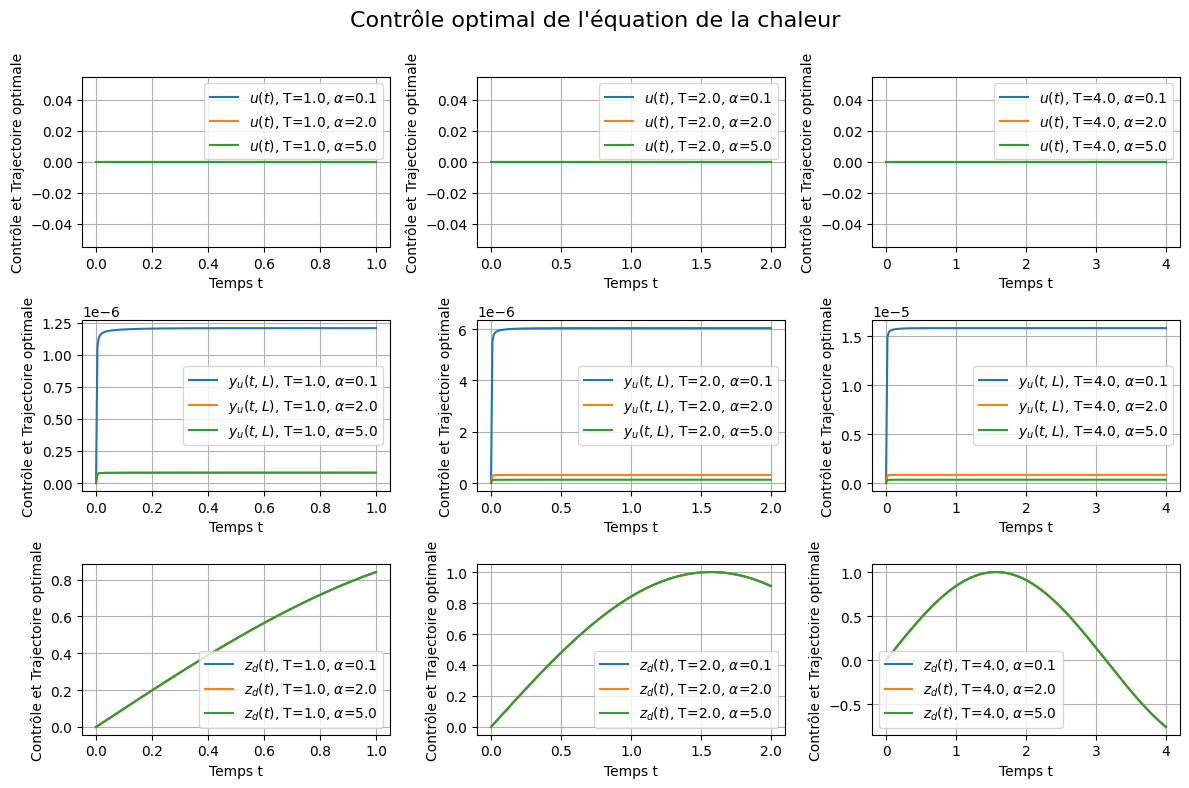

In [121]:
# Paramètres à faire varier
T_values = [1.0, 2.0, 4.0]
alpha_values = [0.1, 2.0, 5.0]

def zd(t):
    return np.sin(t)


Test(alpha_values,T_values, zd)


### Test 2 : avec $\alpha$ petit et $T$ grand

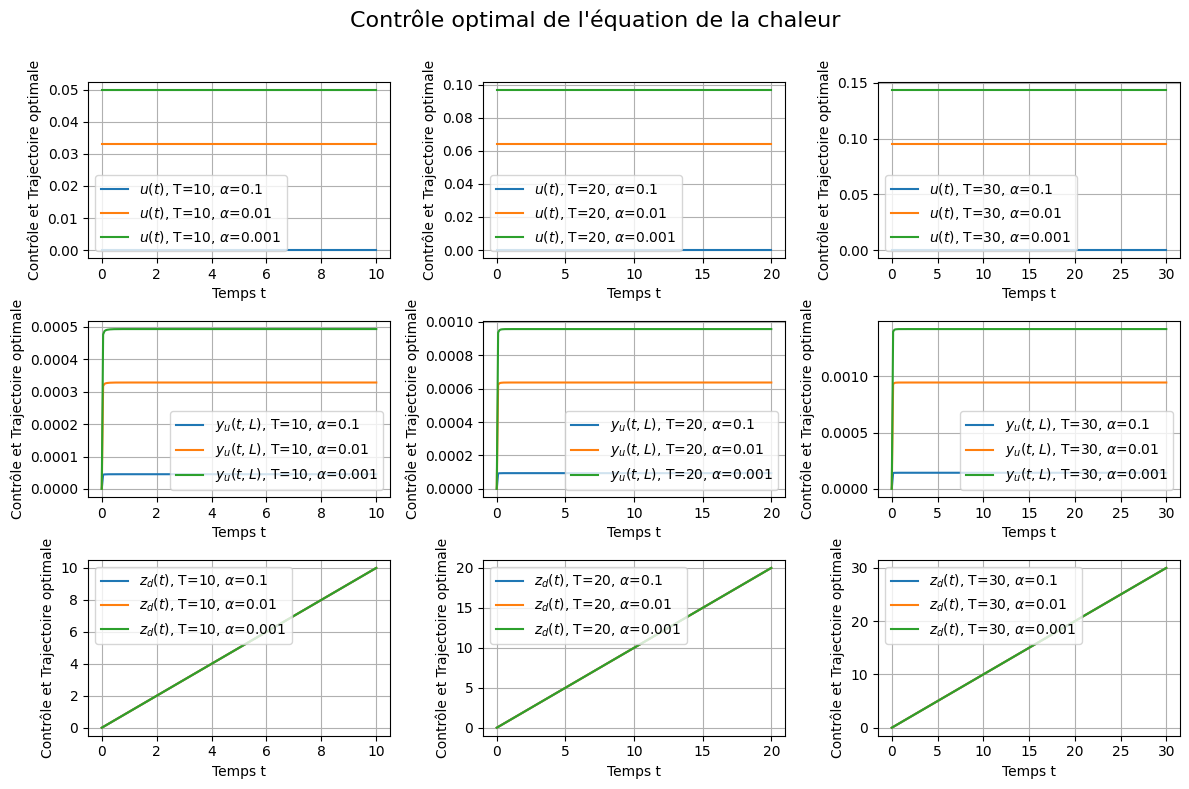

In [124]:
# Paramètres à faire varier
T_values = [10, 20, 30]
alpha_values = [0.1, 0.01, 0.001]
def zd(t):
    return t

Test(alpha_values,T_values, zd)

### Test 3: avec $\alpha$ petit

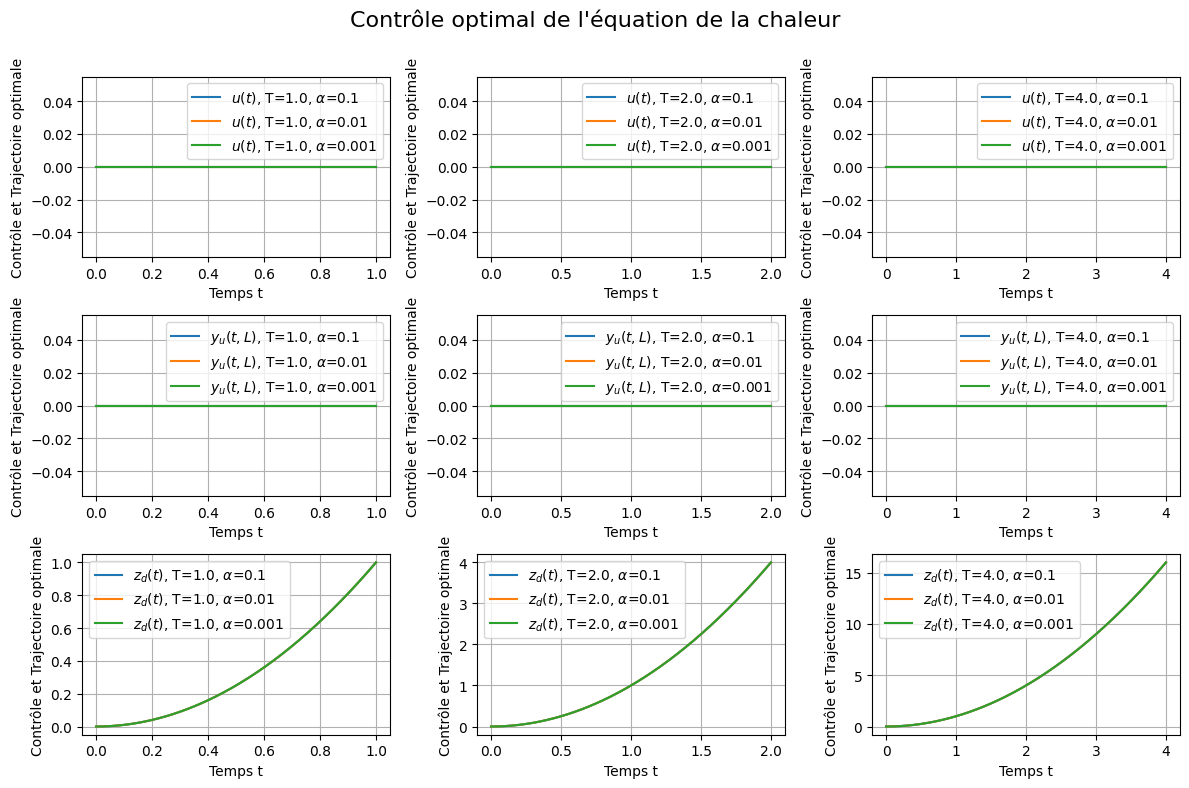

In [125]:
# Paramètres à faire varier
T_values = [1.0, 2.0, 4.0]
alpha_values = [0.1, 0.01, 0.001]

def zd(t):
        return t**2

Test(alpha_values,T_values, zd)